# 앙상블 모델 (다:1)
* 2개의 모델이 합쳐져서 1개의 모델로 출력되는 경우 
* 앙상블 모델 중에서 가장 많이 사용하는 모델 

## 1. 데이터

In [1]:
import numpy as np

* 각각 300개씩의 데이터를 가지고 있는 2개의 x 
* 100개의 데이터를 가지고 있는 1개의 y

In [2]:
x1 = np.array([range(1, 101), range(101, 201)])
x2 = np.array([range(501, 601), range(601, 701)])
y = np.array([range(1, 101), range(101, 201)])
print(x1.shape)
print(x2.shape)
print(y.shape)

(2, 100)
(2, 100)
(2, 100)


#### 모양 바꿔주기 
* (100, 2) : 행 100, 열 2 

In [3]:
x1 = np.transpose(x1)
x2 = np.transpose(x2)
y = np.transpose(y)

print(x1.shape)
print(x2.shape)
print(y.shape)

(100, 2)
(100, 2)
(100, 2)


#### train, test, validation 분리 
* 8:1:1 로 분리 

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=66, test_size=0.2, shuffle=False)
x1_val, x1_test, y_val, y_test = train_test_split(x1_test, y_test, random_state=66, test_size=0.5, shuffle=False)
x2_train, x2_test = train_test_split(x2, random_state=66, test_size=0.2, shuffle=False)
x2_val, x2_test = train_test_split(x2_test, random_state=66, test_size=0.5, shuffle = False)
print('x2_train.shape : ', x2_train.shape)
print('x2_val.shape : ', x2_val.shape)
print('x2_test.shape : ', x2_test.shape)

x2_train.shape :  (80, 2)
x2_val.shape :  (10, 2)
x2_test.shape :  (10, 2)


## 2 모델 구성 

In [6]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

#### 서로 다른 2개의 레이어 만들기

In [7]:
input1 = Input(shape=(2,))
dense1 = Dense(100, activation='relu')(input1)
dense1 = Dense(30)(dense1)
dense1 = Dense(7)(dense1)

input2 = Input(shape=(2,))
dense2 = Dense(50, activation='relu')(input2)
dense2 = Dense(30)(dense2)
dense2 = Dense(7)(dense2)

#### 두가지 모델 합치기 

In [8]:
from tensorflow.keras.layers import concatenate

In [9]:
merge1 = concatenate([dense1, dense2])

In [10]:
output1 = Dense(30)(merge1)
output1 = Dense(7)(output1)
output1 = Dense(2)(output1)

In [11]:
model = Model(inputs = [input1, input2], outputs = output1)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 100)          300         input_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 50)           150         input_2[0][0]                    
______________________________________________________________________________________________

## 3. 훈련

In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit([x1_train, x2_train], y_train, epochs=50, batch_size=1, validation_data=([x1_val, x2_val] , y_val))

Train on 80 samples, validate on 10 samples
Epoch 1/50
80/80 [==============================] - 1s 15ms/sample - loss: 1218.8445 - mse: 1218.8445 - val_loss: 567.2196 - val_mse: 567.2196
Epoch 2/50
80/80 [==============================] - 0s 2ms/sample - loss: 187.8517 - mse: 187.8517 - val_loss: 76.3724 - val_mse: 76.3724
Epoch 3/50
80/80 [==============================] - 0s 2ms/sample - loss: 3.4315 - mse: 3.4315 - val_loss: 5.0481 - val_mse: 5.0481
Epoch 4/50
80/80 [==============================] - 0s 2ms/sample - loss: 0.2862 - mse: 0.2862 - val_loss: 2.9708 - val_mse: 2.9708
Epoch 5/50
80/80 [==============================] - 0s 2ms/sample - loss: 0.1679 - mse: 0.1679 - val_loss: 1.0843 - val_mse: 1.0843
Epoch 6/50
80/80 [==============================] - 0s 2ms/sample - loss: 0.1649 - mse: 0.1649 - val_loss: 3.4930 - val_mse: 3.4930
Epoch 7/50
80/80 [==============================] - ETA: 0s - loss: 0.1117 - mse: 0.111 - 0s 2ms/sample - loss: 0.1093 - mse: 0.1093 - val_loss: 1.

## 4. 학습과정확인 

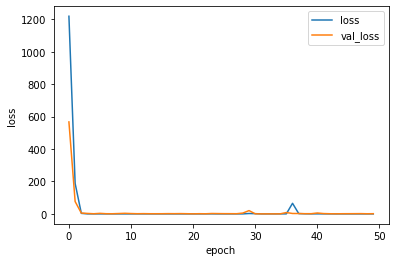

In [13]:
import matplotlib.pyplot as plt
#print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

## 5. 평가 예측

In [14]:
mse = model.evaluate([x1_test, x2_test], y_test, batch_size=1)
print("mse : ", mse )

10/10 [==============================] - 0s 3ms/sample - loss: 8.8776 - mse: 8.8776
mse :  [8.877591371536255, 8.877591]


* y_test : 91에서 100, 191에서 200

In [16]:
y_predict = model.predict([x1_test, x2_test])
print("y 예측값 : \n", y_predict)

y 예측값 : 
 [[ 88.69557  189.1856  ]
 [ 89.47101  190.03996 ]
 [ 90.24644  190.89433 ]
 [ 91.02187  191.74873 ]
 [ 91.7973   192.6031  ]
 [ 92.572754 193.45749 ]
 [ 93.345726 194.3114  ]
 [ 94.10946  195.16362 ]
 [ 94.873146 196.0158  ]
 [ 95.6369   196.86803 ]]
